## Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Alunas: Marilia Meister e Maria Natalia 

Professor: Leonardo Hoinaski
## Abrindo planilha de fatores de emissões compilada.
Nosso empreendimento é a Porto Bello, do ramo de revestiemnto cerâmico. Portanto usamos o capítulo 11.7 da AP42 https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf


In [404]:
# Utilizando Pandas para abrir a planilha
import pandas as pd # importar a biblioteca Pandas e se referir a ela como pd em seu código
import os #Ao importar o 'os' com import os, posso usar as funções do 'os' no código

# Coletando o caminho da pasta que estou
cwd = os.getcwd() #retorna uma string que representa o caminho absoluto para a pasta (diretório) em que o seu script Python está sendo executado no momento

# Pasta dos fatores de emissão
path = cwd +'\\tabelas\\FE' #deverá conter o caminho completo para a pasta dos fatores de emissão, utilizando a estrutura de diretórios especificada
print(path)
print('')

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)
print('')

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file )
display(fe) # a função 'display' exibe um DataFrame 'fe' na tela. Mostrará os dados do arquivo CSV no formato de tabela

#Obs.: Os dados na tabela estão na unidade [kg/Mg] ou também pode ser entendido como [kg/ton]

C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\FE

chp_11_7.csv



,Source,PM,S02,NOX
0,BMP,0.0600,NaN,NaN
1,Secador,1.1500,NaN,NaN
2,Resfriador,0.0550,NaN,NaN
3,Granulacao,0.0950,NaN,NaN
4,Queima,0.2450,104.5,0.27
5,Refrigeracao,0.0335,NaN,NaN
6,Esmaltacao,0.0950,NaN,NaN


1
2
3


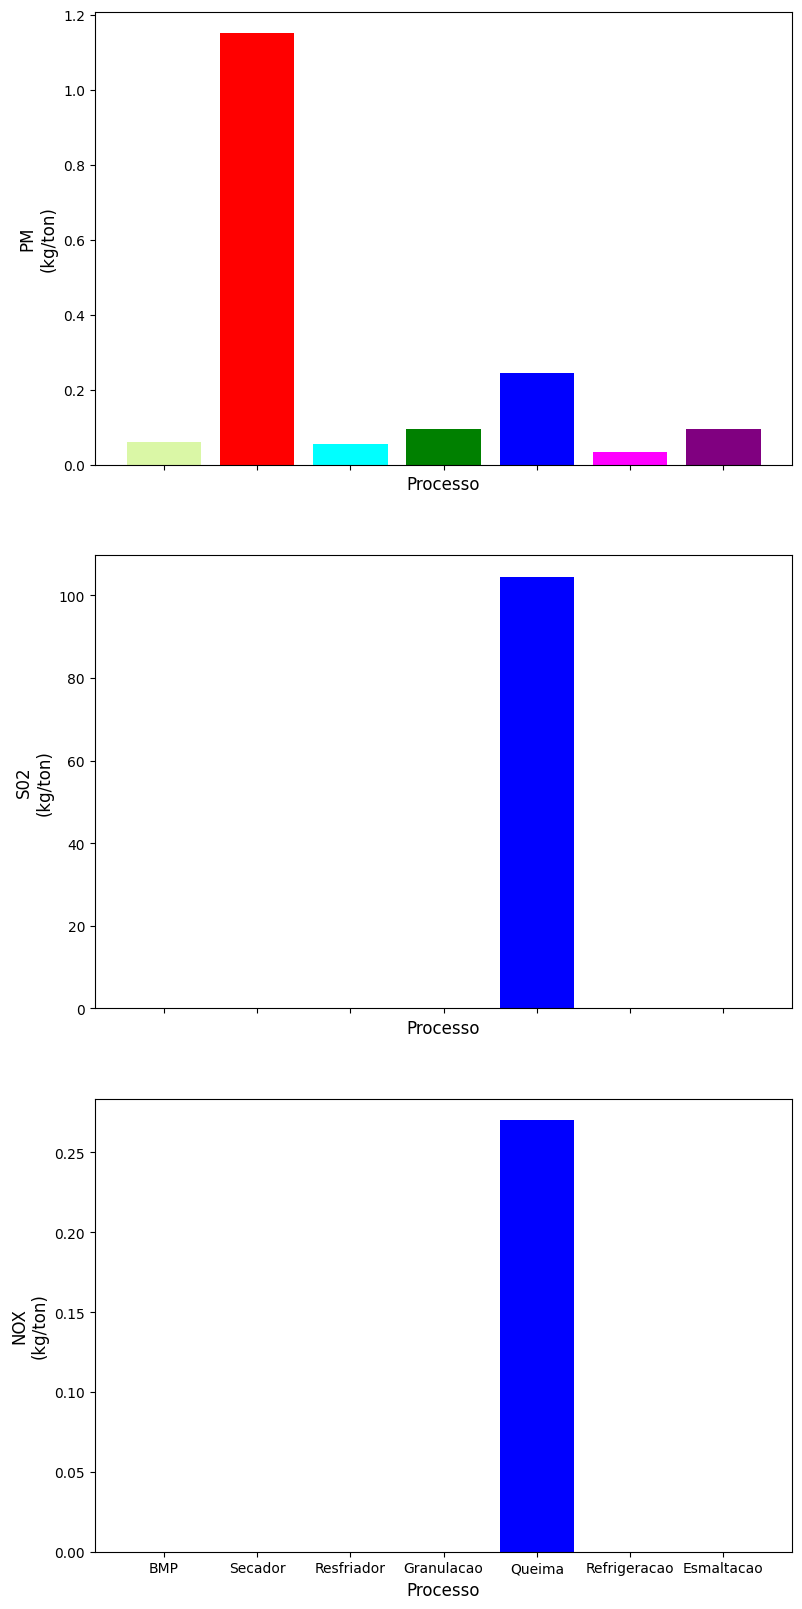

In [405]:
# Plotando os fatores de emissão 
import matplotlib.pyplot as plt #criar visualizações gráficas, como gráficos e plots.

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 20)) #essa linha de código está preparando a estrutura para plotar os dados de cada 
                                                                        #poluente em um subplot separado, todos compartilhando o mesmo eixo x.

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)): #  Este loop for itera sobre os números de 1 até o número de COLUNAS em fe (len(fe.columns)). O uso de range(1, len(fe.columns)) exclui a primeira coluna
   print(ii)
   ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan', 'green', 'blue', 'magenta','purple'])
   ax[ii-1].set_xlabel('Processo', fontsize=12) #fontsize=8 é um argumento usado para definir o tamanho da fonte
   ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=12)

# Salva a figura na pasta figures - criar a pasta antes!! (obs.: após certifizar-se que o código está correto, liberar essa linha para salvar)
#fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

In [406]:
#VISUALIZANDO AS EMISSÕES EM TERMOS ANUAL, MENSAL, DIARIAS E HORÁRIAS:

#Emissão anual
atv_anual = 535945.38 # a taxa de atividade está na unidade [ton/ano]
emis_pm_1 = fe['PM']*atv_anual #o resultado da emissão ficará na unidade [kg/ton]*[ton/ano] = [kg/ano]
emis_so2_1 = fe['S02']*atv_anual #o resultado da emissão ficará na unidade [kg/ton]*[ton/ano] = [kg/ano]
emis_nox_1 = fe['NOX']*atv_anual #o resultado da emissão ficará na unidade [kg/ton]*[ton/ano] = [kg/ano]

#Emissão mensal [kg/mes]
atv_mensal = 535945.38/12 # a taxa de atividade está na unidade [ton/mes]
emis_pm_2 = fe['PM']*atv_mensal #o resultado da emissão ficará na unidade [kg/ton]*[ton/mes] = [kg/mes]
emis_so2_2 = fe['S02']*atv_mensal 
emis_nox_2 = fe['NOX']*atv_mensal 

#Emissão diaria [kg/dia]
atv_dia = (535945.38/12)/30 # a taxa de atividade está na unidade [ton/dia]
emis_pm_3 = fe['PM']*atv_dia #o resultado da emissão ficará na unidade [kg/ton]*[ton/dia] = [kg/dia]
emis_so2_3 = fe['S02']*atv_dia
emis_nox_3 = fe['NOX']*atv_dia

#Emissão horária [kg/h]
atv_h = ((535945.38/12)/30)/24 # a taxa de atividade está na unidade [ton/h]
emis_pm_4 = fe['PM']*atv_h #o resultado da emissão ficará na unidade [kg/ton]*[ton/dia] = [kg/h]
emis_so2_4 = fe['S02']*atv_h 
emis_nox_4 = fe['NOX']*atv_h 

#Emissão por segundo [kg/s]
atv_s = (((535945.38/12)/30)/24)/86400# a taxa de atividade está na unidade [ton/s]
emis_pm_4 = (fe['PM']*atv_s)*1000 #o resultado da emissão ficará na unidade [kg/ton]*[ton/s] = [kg/h]*1000 = [g/s]
emis_so2_4 = (fe['S02']*atv_s)*1000
emis_nox_4 = (fe['NOX']*atv_s)*1000

#Organizando os dados de emissão total anual, mensal, diaária e horaria em uma tabela
import pandas as pd

# Dados de exemplo para as emissões
data = {
    'Poluente': ['PM', 'SO2', 'NOX'],
    'Emissao_anual [kg/ano] ': [emis_pm_1.sum(), emis_so2_1.sum(), emis_nox_1.sum()],
    'Emissao_mensal [kg/mês]': [emis_pm_2.sum(), emis_so2_2.sum(), emis_nox_2.sum()],
    'Emissao_diaria [kg/dia]': [emis_pm_3.sum(), emis_so2_3.sum(), emis_nox_3.sum()],
    'Emissao_horaria [kg/hora]': [emis_pm_4.sum(), emis_so2_4.sum(), emis_nox_4.sum()],
    'Emissao_por_segundo [g/s]': [emis_pm_4.sum(), emis_so2_4.sum(), emis_nox_4.sum()]
}


# Criar DataFrame com os dados de emissão
df_emissao = pd.DataFrame(data)
display(df_emissao)

# VERIFICAR COMO Salvar os dados em um arquivo Excel na pasta específica!!!!!


,Poluente,Emissao_anual [kg/ano],Emissao_mensal [kg/mês],Emissao_diaria [kg/dia],Emissao_horaria [kg/hora],Emissao_por_segundo [g/s]
0,PM,9.290613e+05,7.742178e+04,2580.725878,1.244563,1.244563
1,SO2,5.600629e+07,4.667191e+06,155573.033917,75.025576,75.025576
2,NOX,1.447053e+05,1.205877e+04,401.959035,0.193846,0.193846


## Criando taxa de atividade aleatória com sazonalidade

Nesta sessão nós criamos uma taxa de atividade da empresa Porto Bello que contenha sazonalidade ao longo dos meses do ano de 2023. Esta variabilidade também contém componente aleatória.

In [420]:
import pandas as pd
import numpy as np

# Criando um intervalo de datas de 2023 com resolução horária
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criando um DataFrame com as datas
df = pd.DataFrame({'date': dates})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['date'].dt.month

# Extrair os semanas das datas e adicioná-los como uma nova coluna no DataFrame
# Criando valor da semana 
sem = np.full(len(df),1)
for i in range(167,8760,168):
    sem[i:] += 1
df['Semana'] = sem
# Extrair o dia de cada data e hora
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# Criando vetor de valores aleatórios
import numpy as np
atvMax = 0.000502564 #[ton/s]
atvMin = 0.000215384 #[ton/s]

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv

# Mostrar o DataFrame resultante
print(df)


                    date  Mes  Semana  day  hour  atividade
0    2023-01-01 00:00:00    1       1    1     0   0.000371
1    2023-01-01 01:00:00    1       1    1     1   0.000371
2    2023-01-01 02:00:00    1       1    1     2   0.000347
3    2023-01-01 03:00:00    1       1    1     3   0.000288
4    2023-01-01 04:00:00    1       1    1     4   0.000480
...                  ...  ...     ...  ...   ...        ...
8732 2023-12-30 20:00:00   12      52   30    20   0.000431
8733 2023-12-30 21:00:00   12      52   30    21   0.000381
8734 2023-12-30 22:00:00   12      52   30    22   0.000499
8735 2023-12-30 23:00:00   12      53   30    23   0.000279
8736 2023-12-31 00:00:00   12      53   31     0   0.000293

[8737 rows x 6 columns]


In [360]:
df.set_index('date',inplace=True)
#df.plot(figsize=(15,6))


KeyError: 'producao_diaria'

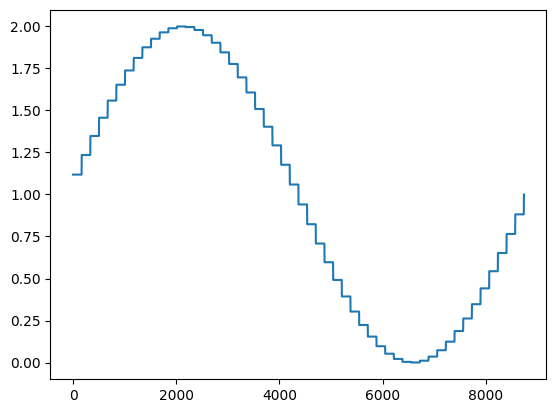

In [421]:
#Importando bliblioteca plt
import matplotlib.pyplot as plt

df['sazonalidade'] = (np.sin(2* np.pi * df['Semana'] / 53)) + 1 # somando 1 no final para não termos produção negativa. 53 representa as 53 semnas no ano 
                                                              

min_producao_hora = 0               #considerando que pode haver dias sem produção [ton/h]
max_producao_hora = 106.1362045     #produção máxima possível em uma hora. [ton/h] considerando que a capacidade máxima é de 45.000.000 m^2/ano, esse foi o valor encontrado para ton/h

variabilidade = (np.random.uniform(min_producao_hora, max_producao_hora, len(df)))+1

df['variabilidade'] = variabilidade
df['producao_diaria [ton/h]'] = df['sazonalidade']*df['variabilidade']

plt.plot(df['sazonalidade'])
plt.plot(df['producao_diaria'])


In [409]:
# Emissão para cada processo
#-------------------------------------Calculando Emissão de MP para todos os processos----------------------------------------

#Lembrando que atividade está em [ton/s] e os valores da taxa de emissão da AP42 está em [kg/ton]
#Lembrar que nessa etapa estamos multiplicando os valores dos fatores de emissão da Ap42 pela coluna de atividade criada anteriormente
#para encontrar a emissão, mas os grafico irão apresentar a soma dessa nova coluna para cada poluente e cada processo

#BRITAGEM DA MATERIA PRIMA COM PM = 0.0600 [kg/ton].
Emissao_BMP_MP = (df['atividade']*0.0600)*1000 # [g/s]
df['Emissao_BMP_MP']= Emissao_BMP_MP
#Achando o total das emissões
BPM_soma_MP = int(df['Emissao_BMP_MP'].sum())

#SECADOR COM PM = 1.1500 [kg/ton]
Emissao_secador_MP = (df['atividade']*1.1500)*1000 # [g/s]
df['Emissao_secador_MP']= Emissao_secador_MP
#Achando o total das emissões
Secador_soma_MP = int(df['Emissao_secador_MP'].sum())

#RESFRIADOR COM PM = 0.0550 [kg/ton]
Emissao_resfriador_MP = (df['atividade']*0.0550)*1000 # [g/s]
df['Emissao_resfriador_MP']= Emissao_resfriador_MP
#Achando o total das emissões
Resfriador_soma_MP = int(df['Emissao_resfriador_MP'].sum())

#GRANULAÇÃO COM PM = 0.0950 [kg/ton]
Emissao_granulacao_MP = (df['atividade']*0.0950)*1000 # [g/s]
df['Emissao_granulacao_MP']= Emissao_granulacao_MP
#Achando o total das emissões
Granulacao_soma_MP = int(df['Emissao_granulacao_MP'].sum())

#QUEIMA COM PM = 0.2450	 [kg/ton]
Emissao_queima_MP = (df['atividade']*0.2450)*1000 # [g/s]
df['Emissao_queima_MP']= Emissao_queima_MP
#Achando o total das emissões
Queima_soma_MP = int(df['Emissao_queima_MP'].sum())

#REFRIGERAÇÃO COM PM = 0.0335 [kg/ton]
Emissao_refrigeracao_MP = (df['atividade']*0.0335)*1000 # [g/s]
df['Emissao_refrigeracao_MP']= Emissao_refrigeracao_MP
#Achando o total das emissões
Refrigeracao_soma_MP = int(df['Emissao_refrigeracao_MP'].sum())

#ESMALTAÇÃO COM PM = 0.0950 [kg/ton]
Emissao_esmaltacao_MP = (df['atividade']*0.0950)*1000 # [g/s]
df['Emissao_esmaltacao_MP']= Emissao_esmaltacao_MP
#Achando o total das emissões
Esmaltacao_soma_MP = int(df['Emissao_esmaltacao_MP'].sum())

#Visualisando os resultados da
print(BPM_soma_MP)
print(Secador_soma_MP)
print(Resfriador_soma_MP)
print(Granulacao_soma_MP)
print(Queima_soma_MP)
print(Refrigeracao_soma_MP)
print(Esmaltacao_soma_MP)
#-------------------------------------Calculando Emissão de SO2 para todos os processos----------------------------------------	
#QUEIMA COM SO2 = 104.5	[kg/ton]
Emissao_queima_SO2 = (df['atividade']*104.5)*1000 # [g/s]
df['Emissao_queima_SO2']= Emissao_queima_SO2
#Achando o total das emissões
Queima_soma_SO2 = int(df['Emissao_queima_SO2'].sum())

#Os demais processos não apresentam fator de emissão na AP42, por isso serão considerados como 0

#-------------------------------------Calculando Emissão de NOX para todos os processos----------------------------------------	
#QUEIMA COM NOX = 0.27  [kg/ton]
Emissao_queima_NOX = (df['atividade']*0.27)*1000 # [g/s]
df['Emissao_queima_NOX']= Emissao_queima_NOX
#Achando o total das emissões
Queima_soma_NOX = int(df['Emissao_queima_NOX'].sum())

display(df)

188
3606
172
297
768
105
297


,date,Mes,Semana,day,hour,atividade,sazonalidade,variabilidade,producao_diaria,Emissao_BMP_MP,Emissao_secador_MP,Emissao_resfriador_MP,Emissao_granulacao_MP,Emissao_queima_MP,Emissao_refrigeracao_MP,Emissao_esmaltacao_MP,Emissao_queima_SO2,Emissao_queima_NOX
0,2023-01-01 00:00:00,1,1,1,0,0.000455,1.118273,1.0,1.118273,0.027276,0.522782,0.025003,0.043186,0.111375,0.015229,0.043186,47.504973,0.122740
1,2023-01-01 01:00:00,1,1,1,1,0.000271,1.118273,1.0,1.118273,0.016272,0.311881,0.014916,0.025764,0.066444,0.009085,0.025764,28.340456,0.073224
2,2023-01-01 02:00:00,1,1,1,2,0.000358,1.118273,1.0,1.118273,0.021496,0.412001,0.019704,0.034035,0.087774,0.012002,0.034035,37.438332,0.096731
3,2023-01-01 03:00:00,1,1,1,3,0.000477,1.118273,1.0,1.118273,0.028618,0.548515,0.026233,0.045312,0.116858,0.015978,0.045312,49.843314,0.128782
4,2023-01-01 04:00:00,1,1,1,4,0.000264,1.118273,1.0,1.118273,0.015863,0.304049,0.014541,0.025117,0.064776,0.008857,0.025117,27.628804,0.071385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,52,30,20,0.000332,0.881727,1.0,0.881727,0.019938,0.382140,0.018276,0.031568,0.081412,0.011132,0.031568,34.724881,0.089720
8733,2023-12-30 21:00:00,12,52,30,21,0.000269,0.881727,1.0,0.881727,0.016167,0.309872,0.014820,0.025598,0.066016,0.009027,0.025598,28.157934,0.072753
8734,2023-12-30 22:00:00,12,52,30,22,0.000297,0.881727,1.0,0.881727,0.017831,0.341756,0.016345,0.028232,0.072809,0.009955,0.028232,31.055206,0.080238
8735,2023-12-30 23:00:00,12,53,30,23,0.000400,1.000000,1.0,1.000000,0.024004,0.460080,0.022004,0.038007,0.098017,0.013402,0.038007,41.807293,0.108019


,Processo,Emissão MP [g/s],Emissão SO2 [g/s],Emissão NOX [g/s]
0,BRITAGEM DA MATERIA PRIMA,188,0,0
1,Secador,3606,0,0
2,Resfriador,172,0,0
3,Granulação,297,0,0
4,Queima,768,327737,846
5,Refrigeração,105,0,0
6,Esmaltação,297,0,0


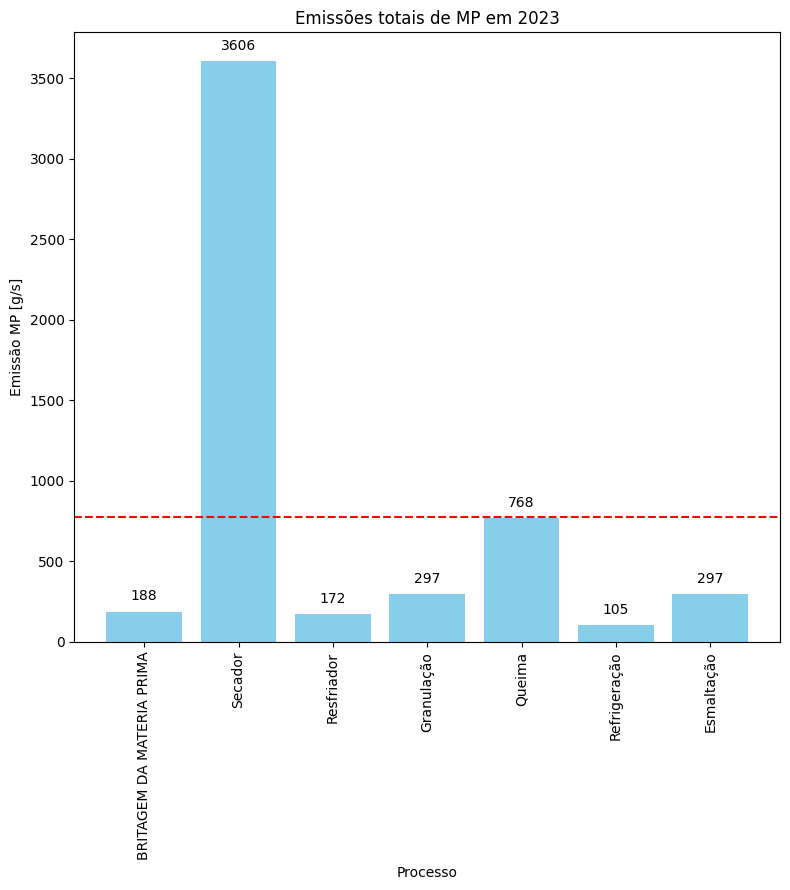

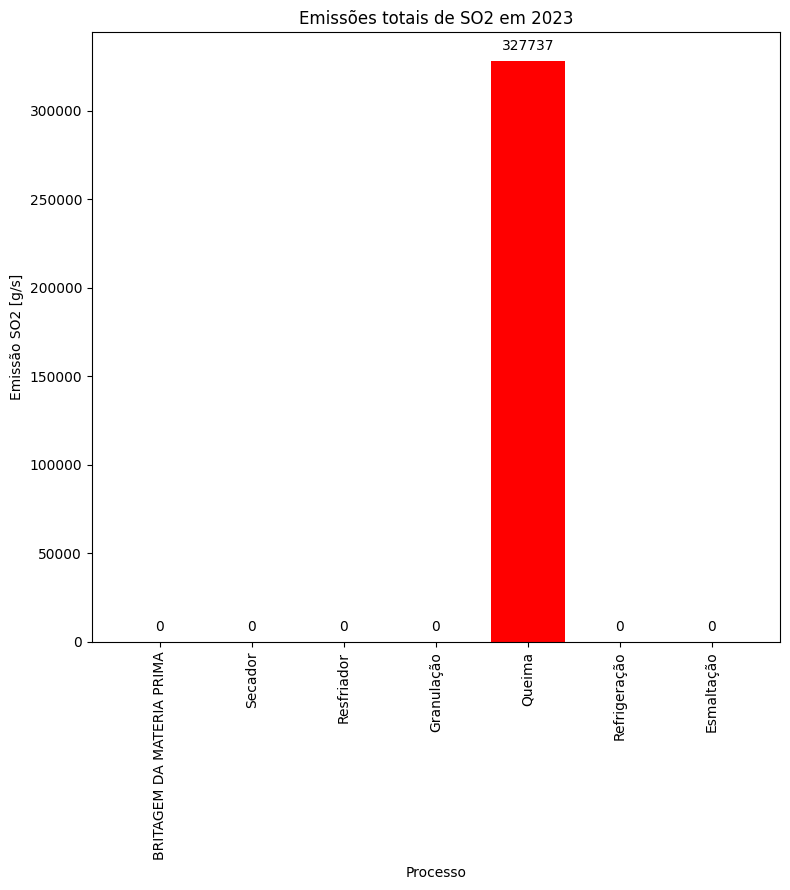

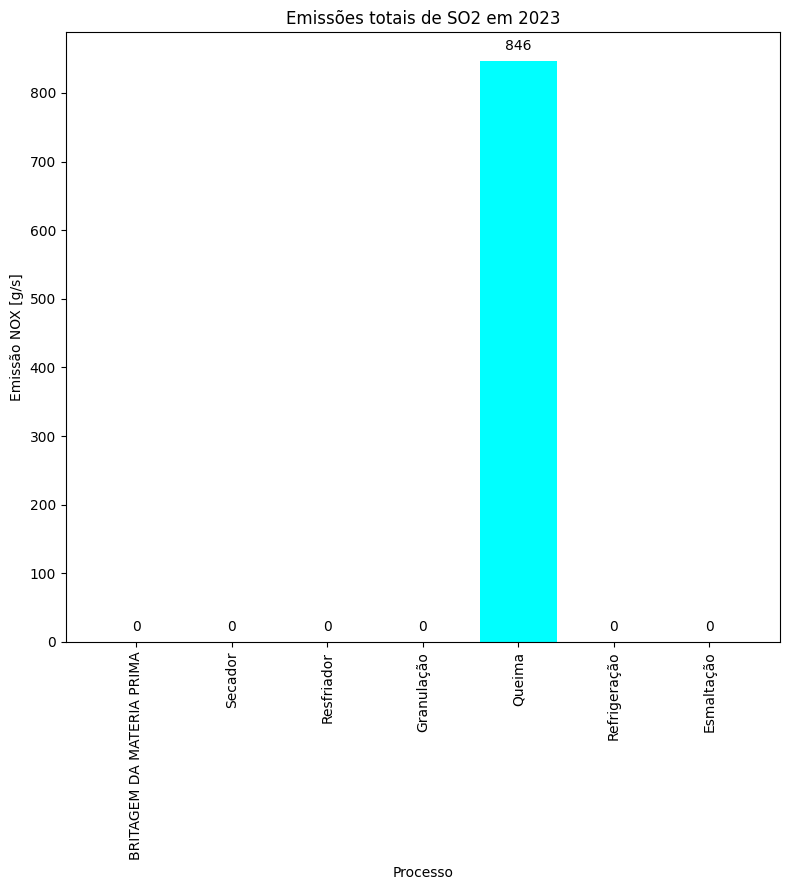

In [410]:
# Criando um dataframe 
data = {'Processo': ['BRITAGEM DA MATERIA PRIMA', 'Secador', 'Resfriador', 'Granulação','Queima', 'Refrigeração', 'Esmaltação'],
        'Emissão MP [g/s]': [BPM_soma_MP, Secador_soma_MP, Resfriador_soma_MP, Granulacao_soma_MP, Queima_soma_MP, Refrigeracao_soma_MP, Esmaltacao_soma_MP],
        'Emissão SO2 [g/s]': [0,0,0,0,Queima_soma_SO2,0,0],
        'Emissão NOX [g/s]': [0,0,0,0,Queima_soma_NOX,0,0]}

df = pd.DataFrame(data)
display(df)

# Calcular a média das Emissões. OBS.: para esse caso só é possível para a emissão de MP que tem mais de um dado.
media_emissao_MP = int(df['Emissão MP [g/s]'].mean())


#-----------------------------Plotar o gráfico de barras para MP---------------------------------------------------------------------

plt.figure(figsize=(8,9))
barras = plt.bar(df['Processo'], df['Emissão MP [g/s]'], color='skyblue')


# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')
    
# Adicionar a média como uma linha no gráfico
plt.axhline(y=media_emissao_MP, color='red', linestyle='--', label='Média de Vendas')


plt.xlabel('Processo')
plt.ylabel('Emissão MP [g/s]')
plt.title('Emissões totais de MP em 2023')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()
#-----------------------------Plotar o gráfico de barras para SO2---------------------------------------------------------------------
plt.figure(figsize=(8, 9))
barras = plt.bar(df['Processo'], df['Emissão SO2 [g/s]'], color='red')


# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')


plt.xlabel('Processo')
plt.ylabel('Emissão SO2 [g/s]')
plt.title('Emissões totais de SO2 em 2023')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()
#-----------------------------Plotar o gráfico de barras para NOX---------------------------------------------------------------------
plt.figure(figsize=(8, 9))
barras = plt.bar(df['Processo'], df['Emissão NOX [g/s]'], color='cyan')

# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')


plt.xlabel('Processo')
plt.ylabel('Emissão NOX [g/s]')
plt.title('Emissões totais de SO2 em 2023')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

## QUAL A SOMA DAS EMISSÕES CONSIDERANDO TODOS OS PROCESSOS? 
QUAL A EMISSÃO MÉDIA, MÁXIMA E MÍNIMA (unidades sempre em gramas por segundo - g/s)

In [401]:
#Encontrando a soma, média e mínima das emissões de MP
Emi_MP = [BPM_soma_MP, Secador_soma_MP, Resfriador_soma_MP, Granulacao_soma_MP, Queima_soma_MP, Refrigeracao_soma_MP, Esmaltacao_soma_MP]
#TOTAL
soma_Emi_MP = sum(Emi_MP)
print(f'A soma das emissões contidas na lista é: {soma_Emi_MP}')
#MÉDIA
med_Emi_MP = int(soma_Emi_MP / len(Emi_MP ))
print(f'A média das emissões de MP é: {med_Emi_MP}')
#MÁXIMO
max_Emi_MP = max(Emi_MP)
print(f'A máxima emissão de MP é: {max_Emi_MP}')
#MÍNIMO
min_Emi_MP = min(Emi_MP)
print(f'A mínima emissão de MP é: {min_Emi_MP}')


A soma das emissões contidas na lista é: 5425
A média das emissões de MP é: 775
A máxima emissão de MP é: 3601
A mínima emissão de MP é: 104


,Poluente,Emissao
0,MP,5425
1,SO2,327737
2,NOX,846


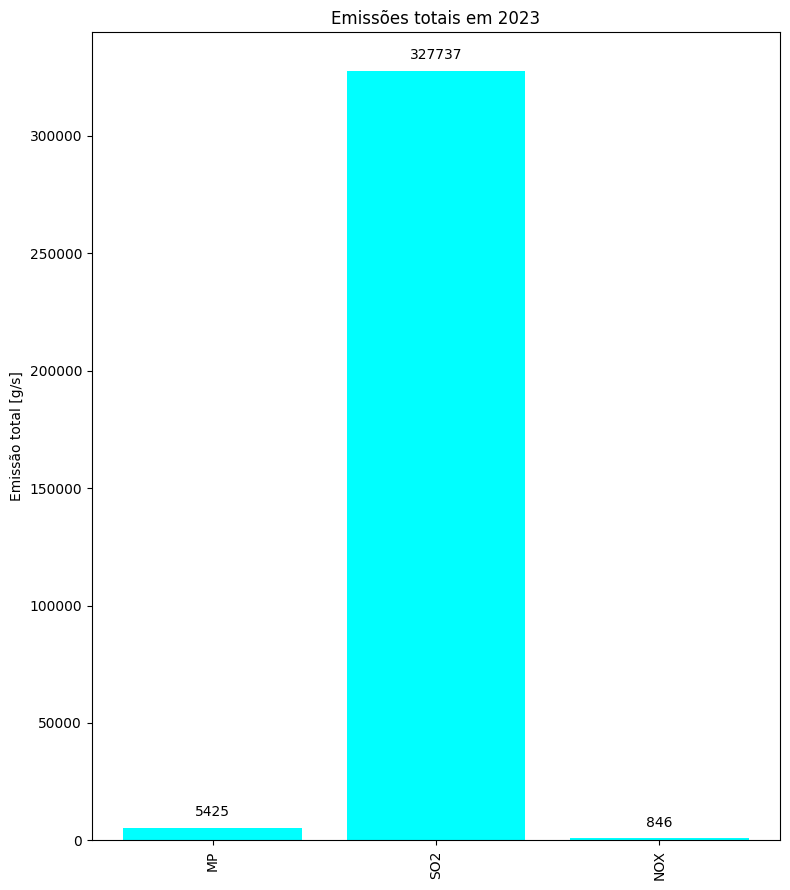

In [418]:
df = pd.DataFrame(data)
display(df)

# Criando um dataframe 
data = {'Poluente': ['MP', 'SO2', 'NOX'],
        'Emissao': [soma_Emi_MP,Queima_soma_SO2, Queima_soma_NOX]}

#Plotando o gráfico
plt.figure(figsize=(8, 9))
barras = plt.bar(df['Poluente'], df['Emissao'], color='cyan')

# Adicionar os valores das vendas sobre as barras
for barra in barras:
    height = barra.get_height()
    plt.annotate(f'{height}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 6),  # Deslocamento vertical do texto
                 textcoords='offset points',
                 ha='center', va='bottom')


#lt.xlabel('Processo')
plt.ylabel('Emissão total [g/s]')
plt.title('Emissões totais em 2023')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()